In [59]:
import effector
import numpy as np

In [60]:
np.random.seed(21)

In [61]:
dist = effector.datasets.IndependentUniform(dim=3, low=-1, high=1)
X_test = dist.generate_data(n=200)
axis_limits = dist.axis_limits

In [62]:
model = effector.models.DoubleConditionalInteraction()
predict = model.predict
jacobian = model.jacobian

In [63]:
y_limits = [-6, 8]
dy_limits = [-15, 15]

## Global Effects

### RHALE

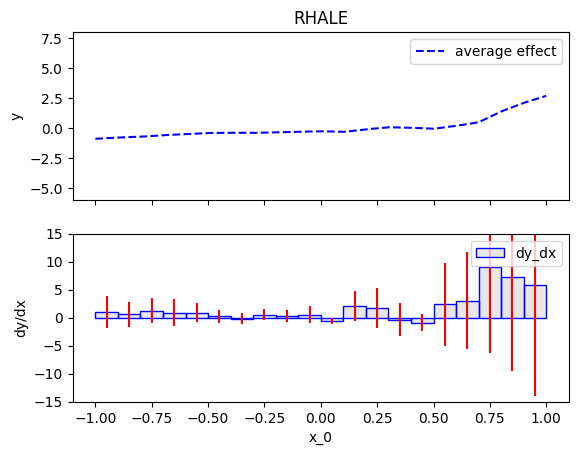

In [64]:
rhale = effector.RHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")
rhale.plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

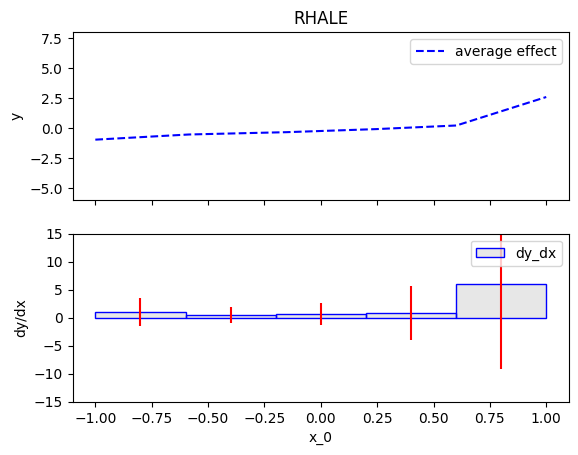

In [65]:
rhale = effector.RHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")
rhale.fit(features=0, binning_method=effector.axis_partitioning.Fixed(nof_bins=5))
rhale.plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

### ShapDP

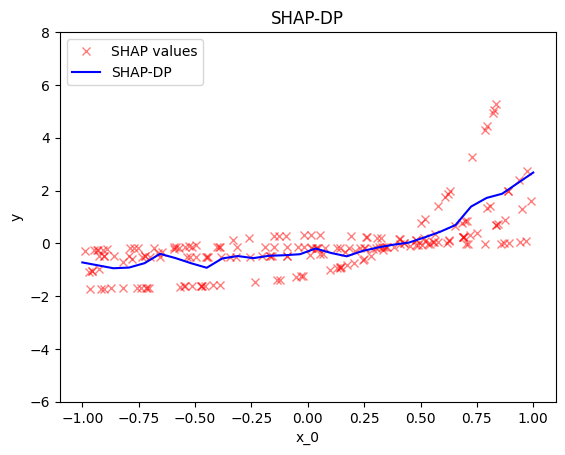

In [66]:
shap_dp = effector.ShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
shap_dp.plot(feature=0, y_limits=y_limits)

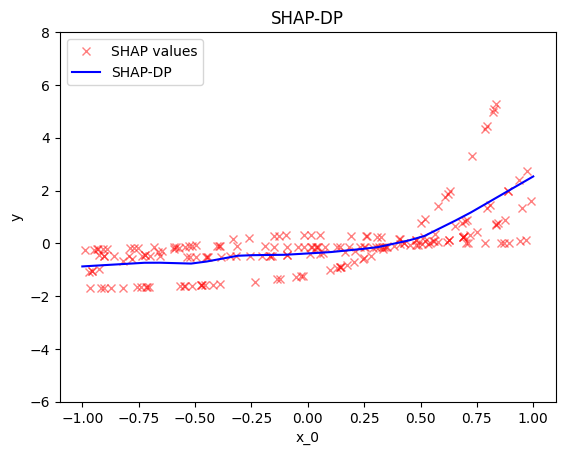

In [67]:
shap_dp = effector.ShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
shap_dp.fit(features=0, binning_method=effector.axis_partitioning.Fixed(nof_bins=10))
shap_dp.plot(feature=0, y_limits=y_limits)

## Regional Effect

### RHALE

In [68]:
r_rhale = effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")

In [69]:
r_rhale.summary(0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.71it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 60.47 || nof_instances:   200 || weight: 1.00
        Node id: 1, name: x_0 | x_2 <= 0.0, heter: 2.36 || nof_instances:   105 || weight: 0.53
                Node id: 3, name: x_0 | x_2 <= 0.0 and x_1 <= 0.0, heter: 0.06 || nof_instances:    45 || weight: 0.23
                Node id: 4, name: x_0 | x_2 <= 0.0 and x_1  > 0.0, heter: 0.00 || nof_instances:    60 || weight: 0.30
        Node id: 2, name: x_0 | x_2  > 0.0, heter: 70.28 || nof_instances:    95 || weight: 0.47
                Node id: 5, name: x_0 | x_2  > 0.0 and x_1 <= 0.0, heter: 0.00 || nof_instances:    45 || weight: 0.23
                Node id: 6, name: x_0 | x_2  > 0.0 and x_1  > 0.0, heter: 8.08 || nof_instances:    50 || weight: 0.25
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 60.47
        Level 1, heter: 34.62 || heter drop : 25.85 (units), 42.75% (pcg)
                Level 2, heter: 2.

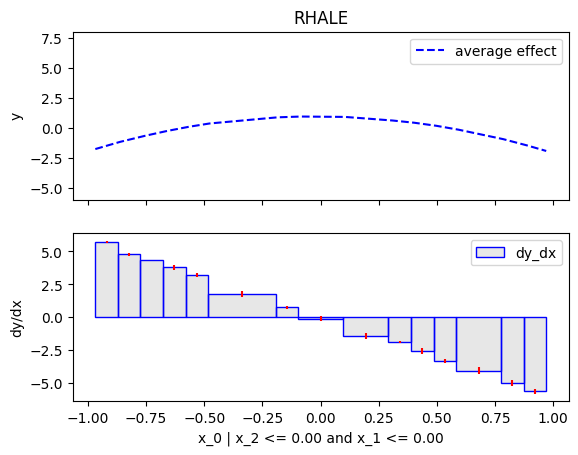

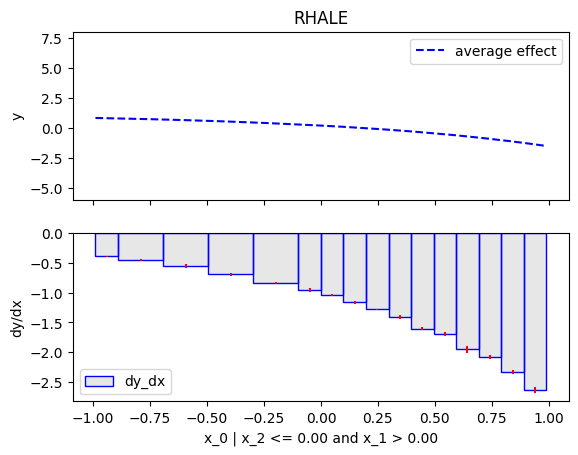

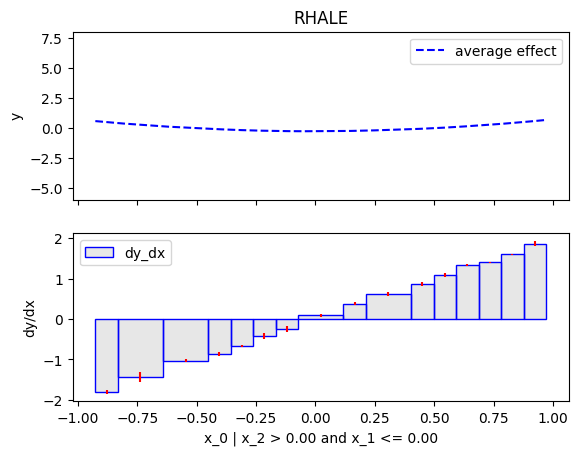

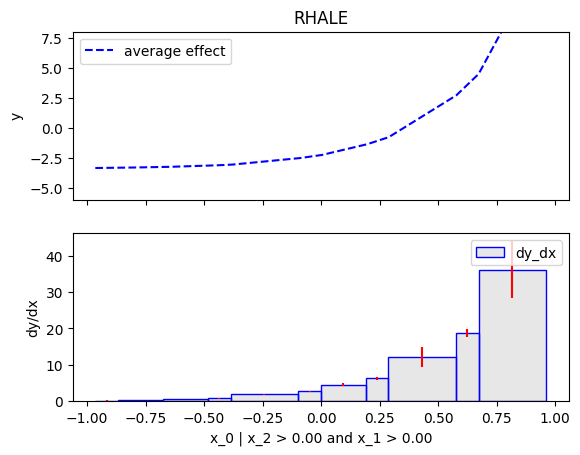

[None, None, None, None]

In [70]:
[r_rhale.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (3, 7)]

In [71]:
r_rhale = effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits, nof_instances="all")

In [72]:
space_partitioner = effector.space_partitioning.Best(max_depth=1)
binning_method = effector.axis_partitioning.Greedy(init_nof_bins=10)
r_rhale.fit(features=0, space_partitioner=space_partitioner, binning_method=binning_method)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.87it/s]


In [73]:
r_rhale.summary(0)



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 53.64 || nof_instances:   200 || weight: 1.00
        Node id: 1, name: x_0 | x_2 <= 0.0, heter: 2.42 || nof_instances:   105 || weight: 0.53
        Node id: 2, name: x_0 | x_2  > 0.0, heter: 61.95 || nof_instances:    95 || weight: 0.47
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 53.64
        Level 1, heter: 30.70 || heter drop : 22.94 (units), 42.77% (pcg)




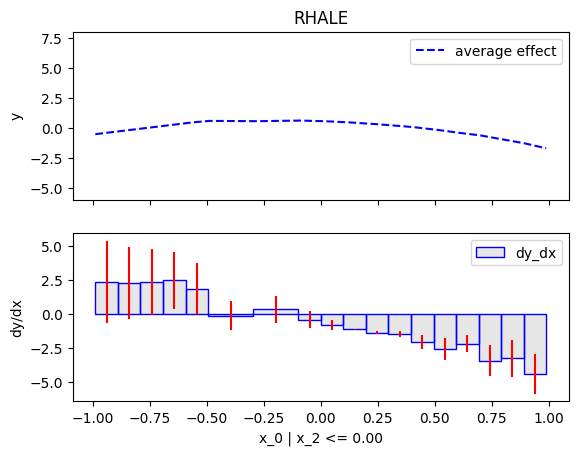

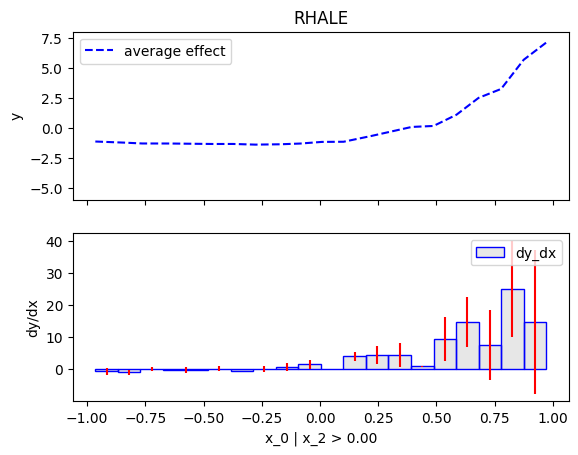

[None, None]

In [74]:
[r_rhale.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (1, 3)]

## SHAP-DP

In [75]:
r_shap_dp = effector.RegionalShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")

In [76]:
r_shap_dp.summary(0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.20it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 1.06 || nof_instances:   200 || weight: 1.00
        Node id: 1, name: x_0 | x_2 <= 0.0, heter: 0.08 || nof_instances:   105 || weight: 0.53
                Node id: 3, name: x_0 | x_2 <= 0.0 and x_1 <= 0.0, heter: 0.00 || nof_instances:    45 || weight: 0.23
                Node id: 4, name: x_0 | x_2 <= 0.0 and x_1  > 0.0, heter: 0.00 || nof_instances:    60 || weight: 0.30
        Node id: 2, name: x_0 | x_2  > 0.0, heter: 0.98 || nof_instances:    95 || weight: 0.47
                Node id: 5, name: x_0 | x_2  > 0.0 and x_1 <= 0.0, heter: 0.01 || nof_instances:    45 || weight: 0.23
                Node id: 6, name: x_0 | x_2  > 0.0 and x_1  > 0.0, heter: 0.34 || nof_instances:    50 || weight: 0.25
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 1.06
        Level 1, heter: 0.51 || heter drop : 0.55 (units), 52.16% (pcg)
                Level 2, heter: 0.09 ||

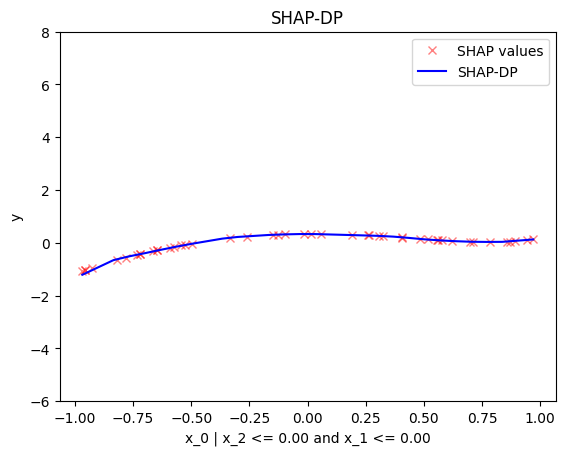

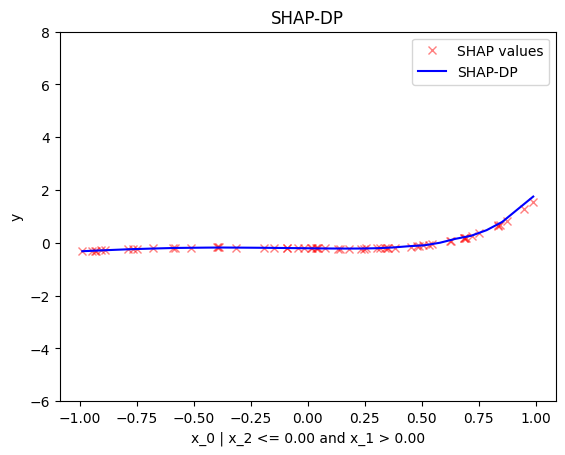

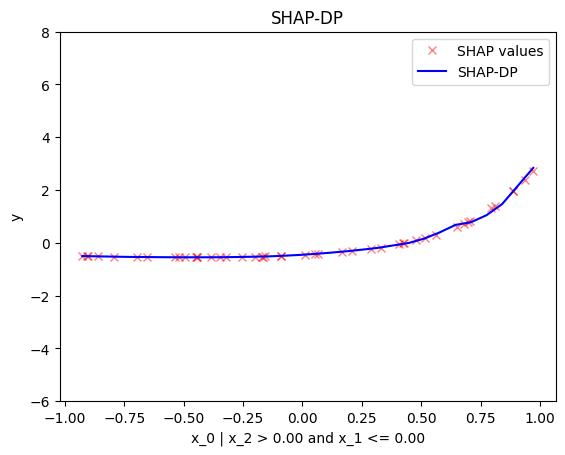

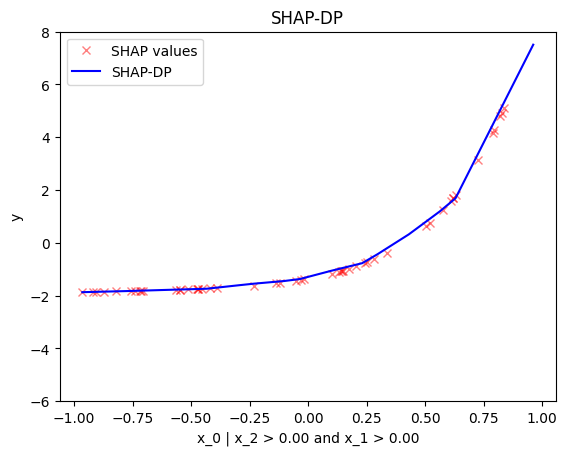

[None, None, None, None]

In [77]:
[r_shap_dp.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (3, 7)]

In [78]:
r_shap_dp = effector.RegionalShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")

In [79]:
space_partitioner = effector.space_partitioning.Best(max_depth=1)
binning_method = effector.axis_partitioning.Greedy(init_nof_bins=10)
r_shap_dp.fit(features=0, space_partitioner=space_partitioner, binning_method=binning_method)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.32it/s]


In [80]:
r_shap_dp.summary(0)



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 1.04 || nof_instances:   200 || weight: 1.00
        Node id: 1, name: x_0 | x_2 <= 0.0, heter: 0.08 || nof_instances:   105 || weight: 0.53
        Node id: 2, name: x_0 | x_2  > 0.0, heter: 0.97 || nof_instances:    95 || weight: 0.47
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 1.04
        Level 1, heter: 0.50 || heter drop : 0.54 (units), 51.98% (pcg)




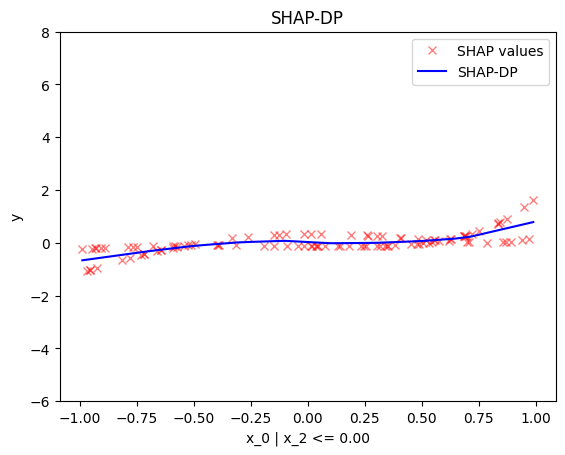

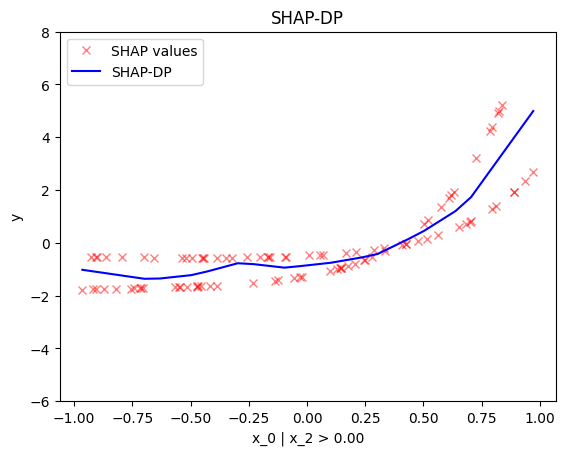

[None, None]

In [81]:
[r_shap_dp.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (1, 3)]